#EDA

PRESTITO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [41]:
df = pd.read_csv('loan.csv')

In [26]:
df.shape

(614, 13)

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [6]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [7]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

possiamo considerare come numerici: ApplicantIncome, CoapplicantIncome, LoanAmount

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


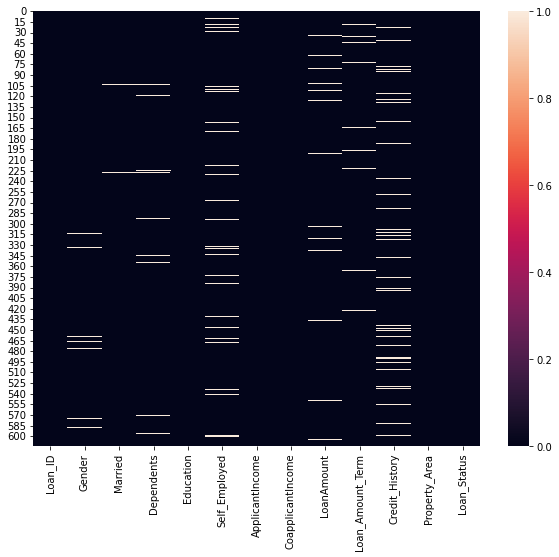

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull());

In [42]:
#trasformiamo in index LOAN ID
df = df.set_index('Loan_ID')

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

In [43]:

categorical_features = df.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Status'], axis=1)
numerical_features = df[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']]


In [44]:
df[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']] = df[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']].fillna(df[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']].mean()) 


In [32]:
 df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##Convert categorical values to numeric

In [33]:
categorical_features

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,
LP001002,Male,No,0,Graduate,No,360.0,1.0,Urban
LP001003,Male,Yes,1,Graduate,No,360.0,1.0,Rural
LP001005,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban
LP001006,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban
LP001008,Male,No,0,Graduate,No,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,360.0,1.0,Rural
LP002979,Male,Yes,3+,Graduate,No,180.0,1.0,Rural
LP002983,Male,Yes,1,Graduate,No,360.0,1.0,Urban


In [45]:
DependentsColumnDummy = pd.get_dummies(df['Dependents'])
Loan_Amount_TermColumnDummy = pd.get_dummies(df['Loan_Amount_Term'])
Property_AreaColumnDummy = pd.get_dummies(df['Property_Area'])


In [46]:
df = pd.concat((df, DependentsColumnDummy, Loan_Amount_TermColumnDummy, Property_AreaColumnDummy), axis=1).drop(['Dependents','Loan_Amount_Term','Property_Area'],axis=1)

In [47]:
df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1})
df['Loan_Status']

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 614, dtype: int64

In [48]:
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})
df['Married'] = df['Married'].map({'No':0,'Yes':1})
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1})
df['Credit_History'] = df['Credit_History'].map({0.0:0,1.0:1})

In [38]:
df.groupby('Education').count()

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,0,1,...,84.0,120.0,180.0,240.0,300.0,360.0,480.0,Rural,Semiurban,Urban
Education,,,,,,,,,,,,,,,,,,,,,
0,133,0,128,134,134,134,0,134,134,134,...,134,134,134,134,134,134,134,134,134,134
1,468,0,454,480,480,480,0,480,480,480,...,480,480,480,480,480,480,480,480,480,480


In [52]:
 df.isna().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Loan_Status           0
0                     0
1                     0
2                     0
3+                    0
12.0                  0
36.0                  0
60.0                  0
84.0                  0
120.0                 0
180.0                 0
240.0                 0
300.0                 0
360.0                 0
480.0                 0
Rural                 0
Semiurban             0
Urban                 0
dtype: int64

In [57]:
df[['Gender','Self_Employed','Credit_History','Married']] = df[['Gender','Self_Employed','Credit_History','Married']].fillna(df[['Gender','Self_Employed','Credit_History','Married']].mode())

In [54]:
df[['Gender','Self_Employed','Credit_History','Married']].mode()

,Gender,Self_Employed,Credit_History,Married
0,1.0,0.0,1.0,1.0


In [58]:
df.isna().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Loan_Status           0
0                     0
1                     0
2                     0
3+                    0
12.0                  0
36.0                  0
60.0                  0
84.0                  0
120.0                 0
180.0                 0
240.0                 0
300.0                 0
360.0                 0
480.0                 0
Rural                 0
Semiurban             0
Urban                 0
dtype: int64

In [13]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,0,...,84.0,120.0,180.0,240.0,300.0,360.0,480.0,Rural,Semiurban,Urban
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001002,1.0,NaN,1,0.0,5849,0.0,146.412162,NaN,1,1,...,0,0,0,0,0,1,0,0,0,1
LP001003,1.0,NaN,1,0.0,4583,1508.0,128.000000,NaN,0,0,...,0,0,0,0,0,1,0,1,0,0
LP001005,1.0,NaN,1,1.0,3000,0.0,66.000000,NaN,1,1,...,0,0,0,0,0,1,0,0,0,1
LP001006,1.0,NaN,0,0.0,2583,2358.0,120.000000,NaN,1,1,...,0,0,0,0,0,1,0,0,0,1
LP001008,1.0,NaN,1,0.0,6000,0.0,141.000000,NaN,1,1,...,0,0,0,0,0,1,0,0,0,1


In [14]:
df.columns

Index([           'Gender',           'Married',         'Education',
           'Self_Employed',   'ApplicantIncome', 'CoapplicantIncome',
              'LoanAmount',    'Credit_History',       'Loan_Status',
                       '0',                 '1',                 '2',
                      '3+',                12.0,                36.0,
                      60.0,                84.0,               120.0,
                     180.0,               240.0,               300.0,
                     360.0,               480.0,             'Rural',
               'Semiurban',             'Urban'],
      dtype='object')

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             0 non-null      float64
 1   Married            0 non-null      float64
 2   Education          0 non-null      int64  
 3   Self_Employed      0 non-null      float64
 4   ApplicantIncome    0 non-null      int64  
 5   CoapplicantIncome  0 non-null      float64
 6   LoanAmount         0 non-null      float64
 7   Credit_History     0 non-null      float64
 8   Loan_Status        0 non-null      int64  
 9   0                  0 non-null      uint8  
 10  1                  0 non-null      uint8  
 11  2                  0 non-null      uint8  
 12  3+                 0 non-null      uint8  
 13  12.0               0 non-null      uint8  
 14  36.0               0 non-null      uint8  
 15  60.0               0 non-null      uint8  
 16  84.0               0 non-null      uint8  


In [15]:
df = df.dropna()

#SELEZIONE FEATURES E TARGET

In [19]:
target = df['Loan_Status']

In [20]:
X = df.drop(target, axis=1).copy()
y = df[target].copy()

In [23]:
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,0,...,84.0,120.0,180.0,240.0,300.0,360.0,480.0,Rural,Semiurban,Urban
Loan_ID,,,,,,,,,,,,,,,,,,,,,


##X SCALATE

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


ValueError: ignored